In [ ]:
# !pip install dgl-cu101
# !pip install scikit_learn==0.22.2.post1
# !pip install xlrd==1.2.0
# !pip install leidenalg

In [2]:
import sys
sys.path.append("..")
import argparse
import os
import numpy as np
import dgl
from dgl import DGLGraph
import dgl.function as fn
from dgl.nn.pytorch import GraphConv
import torch
import torch.nn as nn
import torch.nn.functional as F

from dgl.data import register_data_args, load_data
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.nn.functional import binary_cross_entropy_with_logits as BCELoss
from torch.utils.data import DataLoader
from tqdm import tqdm
from collections import Counter
import pickle
import h5py
import random
import train
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import glob2
import scanpy.api as sc
import seaborn as sns

%load_ext autoreload
%autoreload 2

Using backend: pytorch
/opt/conda/lib/python3.7/site-packages/dgl/base.py:45: DGLWarning: Detected an old version of PyTorch. Suggest using torch>=1.5.0 for the best experience.
  return warnings.warn(message, category=category, stacklevel=1)
/opt/conda/lib/python3.7/site-packages/scanpy/api/__init__.py:7: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


In [3]:
df = np.array([
    [2, 0, 0, 10],
    [5, 1, 0, 0],
    [0, 0, 1, 9],
])

In [4]:
pca = PCA(n_components=2).fit_transform(df.T)

In [5]:
pca

array([[-2.91961051,  3.31268909],
       [-3.78411877, -1.06844051],
       [-2.9654605 , -2.16299786],
       [ 9.66918978, -0.08125072]])

In [20]:
# edges = np.log1p(df)
edges = df
print(edges)
edges = edges / (np.sum(edges, axis=1, keepdims=True) + 1e-6)
print(edges.round(2))

[[ 2  0  0 10]
 [ 5  1  0  0]
 [ 0  0  1  9]]
[[0.17 0.   0.   0.83]
 [0.83 0.17 0.   0.  ]
 [0.   0.   0.1  0.9 ]]


In [7]:
node_features = "scale"
normalize_weights = "per_cell"

In [21]:
graph = train.make_graph(df,
                         None,
                         dense_dim=2,
                         node_features=node_features,
                         normalize_weights=normalize_weights,
                         edge_norm=True)

/opt/conda/lib/python3.7/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


In [22]:
graph.edges()

(tensor([3, 3, 0, 0, 1, 2, 0, 1, 2, 3, 4, 5, 6]),
 tensor([6, 4, 5, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6]))

In [23]:
graph.edata["weight"]

tensor([[1.8000],
        [1.6667],
        [1.6667],
        [0.3333],
        [0.3333],
        [0.2000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000]])

In [26]:
graph.ndata

{'id': tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [-1],
        [-1],
        [-1]], dtype=torch.int32), 'features': tensor([[-1.6120, -0.2159],
        [-1.5523,  0.1075],
        [ 1.3573,  0.8382],
        [ 1.8071, -0.7299],
        [ 1.2372, -0.6442],
        [-1.6021, -0.1620],
        [ 1.7621, -0.5730]])}

In [49]:
pca = graph.ndata["features"].numpy().round(2)

Gene 1 [-1.61, -0.22]
Gene 2 [-1.55, 0.11]
Gene 3 [1.36, 0.84]
Gene 4 [1.81, -0.73]
Cell 1 [1.24, -0.64]
Cell 2 [-1.60, -0.16]
Cell 3 [1.76, -0.57]


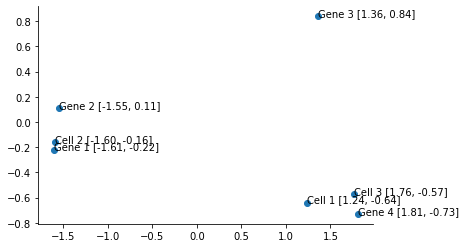

In [59]:
plt.scatter(pca[:, 0], pca[:, 1])
for i in range(len(pca)):
    title = f"Gene {i+1}" if i<4 else f"Cell {i-3}"
    title += f" [{pca[i, 0]:.2f}, {pca[i, 1]:.2f}]"
    print(title)
    plt.text(pca[i, 0], pca[i, 1], title)
sns.despine()

In [61]:
f"{3:08d}"

'00000003'

In [39]:
print(pca[i, 0])

1.76


In [ ]:
df = np.array([
    [2, 0, 0, 10],
    [5, 1, 0, 0],
    [0, 0, 1, 9],
])